# Corrección de aberraciones cromáticas
## Solución basada en el formato HSV, el uso de máscaras y la bajada de saturación

## 1. Integrantes del grupo

Esta práctica ha sido elaborada por el grupo 19 equipo 2, formado por los estudiantes:
* Sergio Álvarez López
* Mario Hernández García
* José Del Castillo Izquierdo
* Nicolás Forero Arévalo
* Álvaro Martín Jiménez

## 2. Descripción del problema

La anomalía de la imagen a corregir es la aberración cromática. 

La aberración cromática es un tipo de aberración óptica, las cuales suelen darse por imperfecciones en la lente. En particular, la aberración cromática se produce cuando la lente no es capaz de hacer converger los distintos colores a un mismo foco.

Las aberraciones cromáticas se caracterizan por una distorsión del color en los contornos de la imagen, produciendo colores con una gran saturación como el verde o el morado.

## 3. Conjunto de imágenes a corregir

Nuestro objetivo principal ha sido la corrección automática y de manera genérica de aberraciones cromáticas. Es por ello que hemos considerado un total de seis imágenes variadas que muestran diferentes tipos de aberraciones cromáticas. Estas imágenes comprenden aberraciones verdes, moradas, amarillas y azules.

Este conjunto de imágenes recoge desde esculturas oxidadas con claras aberraciones cromáticas verdes y moradas en sus contornos, hasta facultades con aberraciones cromáticas amarillas y moradas a lo largo de los bordes de su fachada.

Además, permitimos al usuario evaluar nuestro algoritmo en una imagen de su elección, dándole la facilidad de importar esta imagen en local o mediante una url.

## 4. Solución propuesta

Como hemos comentado anteriormente, nuestro objetivo principal ha sido la detección y corrección de aberraciones cromáticas de una manera automática y general.

Nuestra solución se basa en el modelo de color HSV (Hue, Saturation, Value), del cual aprovecharemos en especial los valores Hue y Saturation tanto para la detección de la aberración mediante máscaras, como para su posterior corrección mediante la bajada de saturación.

Primeramente, calculamos una máscara sobre la imagen con el fin de detectar la aberración. Esta máscara consistirá en una imagen, con las mismas dimensiones que la original, pero completamente en negro a excepción de unos píxeles blancos que señalan dónde se encuentra la aberración.
AQUÍ @NICO ESCRIBE CÓMO HA DESARROLLADO LA MÁSCARA

Una vez hemos detectado dónde se encuentra la aberración, aplicaremos la corrección donde la máscara así lo indique. Esta corrección se basa en bajar por completo la saturación en las zonas indicadas, transformando los colores saturados, como el verde y el morado, en unos tonos grisaceos.

La solución propuesta tiene un caracter general en tanto que la máscara se calcula de manera automática para cada imagen, evitando así la intervención humana para la detección de la aberración.

## 5. Ejecución paso a paso del algoritmo comentada

Primeramente ejecutamos todos los import necesarios. Muestro aquí una lista de todos ellos así como sus principales usos.

* matplotlib - generación de las imágenes a partir de las matrices
* numpy - manejo de las matrices que representan las imágenes
* skimage - manejo de las imágenes, desde su carga hasta el paso de espacio entre colores (RGB, HSV)
* cv2 - desarrollo de la máscara
* urllib - importación de imágenes vía url
* os - importación de imágenes desde un fichero local


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import data
from skimage.color import rgb2hsv
from skimage.color import hsv2rgb
import cv2
import urllib

Definimos la función con la que mostraremos resultados en gran tamaño.

In [4]:
def imshow(img):
    fig, ax = plt.subplots(figsize=(11,11))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()


En este momento, el usuario decide a qué imagen le quiere aplicar la corrección.

El usuario selecciona una de las fotos propuestas o una a su elección. En caso de que la foto a corregir no pertenezca al conjunto previamente seleccionado con el que el algoritmo se ha testeado, se ruega que la imagen contenga aberraciones cromáticas basadas en los colores verde, morado, amarillo o azul.

@MARIO PORFA, CHECKEA QUE TODO LO QUE DIGO EN ESTE PÁRRAFO SOBRE CÓMO IMPORTAR IMÁGENES ES CORRECTO

Si se quiere seleccionar una foto fuera del conjunto elegido, se tienen dos opciones:
1. Introducir una nueva imagen en la carpeta fotos y pasar por parámetro en la siguiente celda el nombre del archivo sin su extensión.
2. Introducir la URL donde resida la foto. La foto debe estar en uno de los siguientes formatos: .PNG, .JPG o .JPEG

Finalmente, se muestra en gran tamaño la imagen original sobre la que se aplicara la corrección.

Introduzca el nombre de la foto que desee ver (peine, arbol, terraza, facultad, tronco o pajaro).
Para introducir una URL pulse la tecla ENTER. 
Se puede añadir una nueva imagen a la carpeta fotos y escribir el nombre del archivo sin su extensión.
pajaro


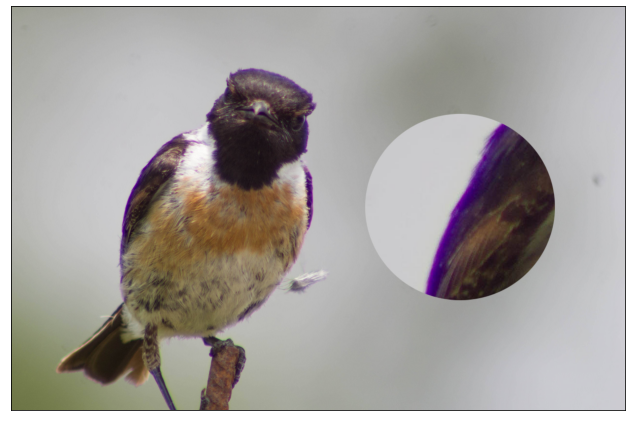

In [9]:
#Para que funcione se deben tener las imágenes descargadas de  github en el almacenamiento interno

print("Introduzca el nombre de la foto que desee ver (peine, arbol, terraza, facultad, tronco o pajaro).\n"\
      "Para introducir una URL pulse la tecla ENTER. \n"\
      "Se puede añadir una nueva imagen a la carpeta fotos y escribir el nombre del archivo sin su extensión.")
nombre_foto = input()


def url_to_image(url):
    # descargamos la imagen, la convertimos en un array NumPy, y leemos la imagen en formato OpenCV (BGR). 
    # Cambiamos la matriz de datos de la imagen a RGB para representarla con la librería plt 
    # sin intercambiar sus canales por defecto.
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return image

if nombre_foto =='':
    print('Introduzca la URL de la foto en formato .PNG, .JPG o .JPEG')
    URL = input()
    datos_foto= url_to_image(URL)  
        
import os
#si nuestro archivo está en la carpeta local
if nombre_foto !='':
    data_dir = 'fotos/'
    foto = os.path.join(data_dir,  nombre_foto+'.png')
    from skimage import io
    datos_foto = io.imread(foto)
    
imshow(datos_foto) 
  
    

@NICO: EXPLICACIÓN DE CÓMO SE HA DESARROLLADO LA MÁSCARA (TAL VEZ PONER LA IMAGEN DE LOS COLORES QUE NOS MOSTRASTE EL OTRO DÍA O LA FUENTE SEA UNA BUENA IDEA) # meter explicación de Nico sobre cómo se han tomado los parámetros para la máscara, foto y fuente

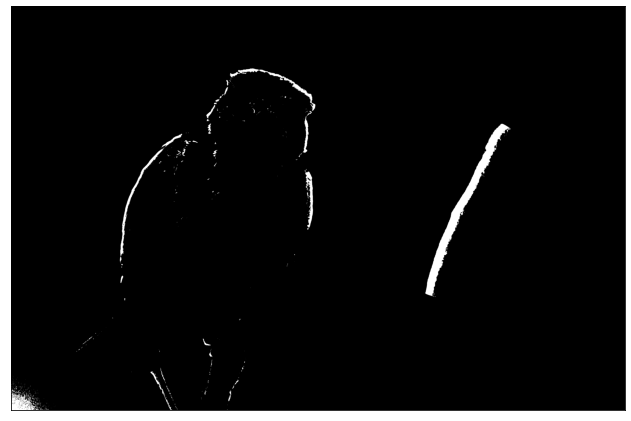

In [10]:
def create_mask(foto):
    
    hsv = cv2.cvtColor(foto, cv2.COLOR_RGB2HSV)

    green_low = np.array([35, 100, 100])
    green_high = np.array([90, 255, 255])
    blue_low = np.array([110, 100, 100])
    blue_high = np.array([170, 255, 255])

    mask1 = cv2.inRange(hsv, green_low, green_high)
    mask2 = cv2.inRange(hsv, blue_low, blue_high)
    mask = cv2.add(mask1, mask2)
    return mask

imshow(create_mask(datos_foto))


Finalmente, una vez se ha detectado la máscara, se procede a su corrección.

Como ya se ha comentado, la corrección se realiza mediante dos bucles anidados en los que se va recorriendo la máscara con el fin de detectar los píxeles blancos, i.e. cuando el valor de la máscara es 255.

Una vez que se encuentra un píxel blanco, se accede a la misma posición pero en la capa correspondiente a la saturación de la imagen por corregir y se baja su valor a cero (recordemos que esto es posible porque estamos trabajando en el espacio HSV y porque las dimensiones de la máscara coinciden con las dimensiones de las capas de la imagen original).

Finalmente, se muestra la imagen corregida, en la que se puede observar cómo los tonos saturados de la aberración cromática han sido reemplazados por tonos grisaceos.

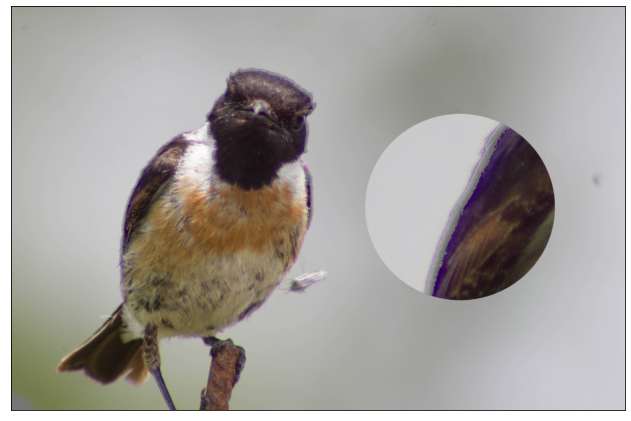

In [11]:
def fix_ab_cromatica(rgb_img):

    hsv_img = rgb2hsv(rgb_img)
    layer_shape = hsv_img[:,:,1].shape
    x_shape = layer_shape[0]
    y_shape = layer_shape[1]
    mascara = create_mask(datos_foto)
    for i in range(x_shape):
        for j in range(y_shape):
            if mascara[i][j] == 255:
                hsv_img[:,:,1][i][j] = 0
    rgb_img_fixed = hsv2rgb(hsv_img)
    return rgb_img_fixed

fixed_foto = fix_ab_cromatica(datos_foto)
imshow(fixed_foto)

Finalizamos el notebook con una comparativa entre la imagen original y la imagen corregida, mostrando también la correspondiente máscara.

Text(0.5, 1.0, 'Imagen corregida')

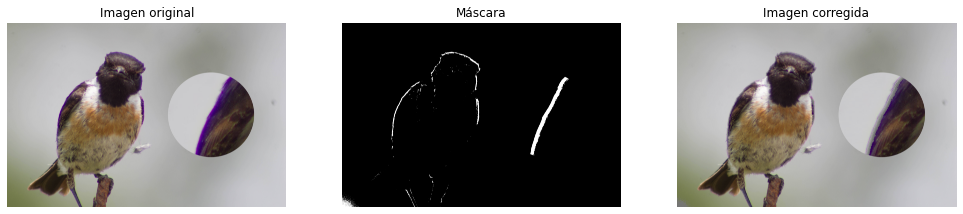

In [12]:
#hacemos una comparativa de los pasos hechos y el resultado obtenido
plt.figure(figsize=(17,12))

plt.subplot (131)
plt.axis('off')
plt.title('Imagen original')
plt.imshow(datos_foto)

plt.subplot (132)
plt.axis('off')
plt.title('Máscara')
plt.imshow(create_mask(datos_foto), cmap=plt.cm.gray)

plt.subplot (133)
plt.imshow(fixed_foto)
plt.axis('off')
plt.title('Imagen corregida')



Muchas gracias por su atención.